<a href="https://colab.research.google.com/github/PranavDscientist/Bank-customer-churn-prediction/blob/main/Bank_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Bank Customers Churn Prediction**

# Aim - Predict the Customer Churn for a Bank.

# About Dataset

* This data set contains details of a bank's customers whether the
customer left the bank (closed his account) or he continues to be a customer.
* The target variable is 'Exited' which indicates whether a customer has churned(1) or not(0)


This dataset contains the data of a bank with following columns:


1.   RowNumber : Corresponds to the row number.
2.   CustomerId : An identifier for each customer.
3. Surname : Surname of the customer.
4. CreditScore : Credit Score of the customer.
5. Geography : The geographic location of the customer.
6. Gender : The gender of the customer.
7. Age : The age of the customer.
8. Tenure : Time period the customer has been a client of the bank.
9. Balance : The account balance of the customer.
10. NumOfProducts : Number of products that a customer has purchased through the bank like loans, credit card, debit card.
11. HasCrCard : Whether the customer has a credit card or not.
12. IsActiveMember : Whether the customer is an active member.
13. EstimatedSalary : Salary of the customer.
14. Exited : used as the target. 1 if the client has left the bank or 0 if client has not left.











# **Importing required libraries**

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')


# **Reading dataset**

In [143]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **Exploratary Data Analysis**

In [144]:
# print first 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [145]:
# print last 5 rows
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [146]:
# checking missing values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [147]:
# checking data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [148]:
# checking shape of data set
df.shape

(10000, 14)

In [149]:
# checking information of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [150]:
# dropping columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **Visualizations**

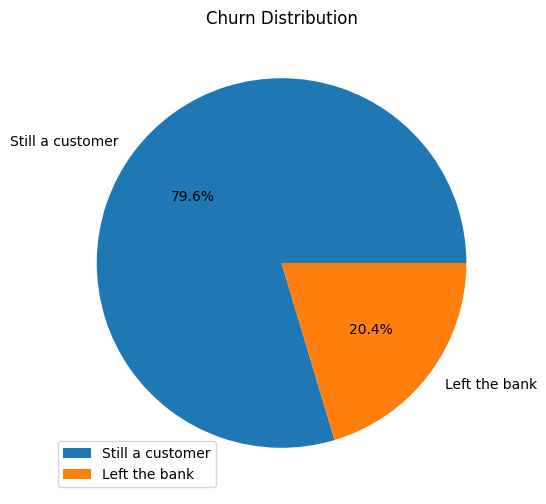

In [151]:
plt.figure(figsize=(8,6))
x=df['Exited'].value_counts()
xlabel=['Still a customer','Left the bank']
plt.pie(x,labels=xlabel,autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.legend(loc='lower left')
plt.show()

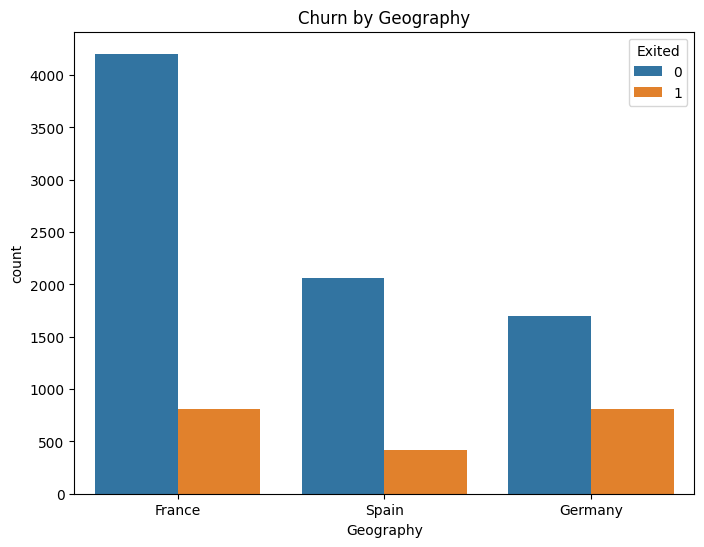

In [152]:
# churn by geography
plt.figure(figsize=(8, 6))
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Churn by Geography')
plt.show()

The churn rate varies across different countries. Germany has the highest churn rate, followed by France and Spain. This suggests that geographic location may impact customer churn.

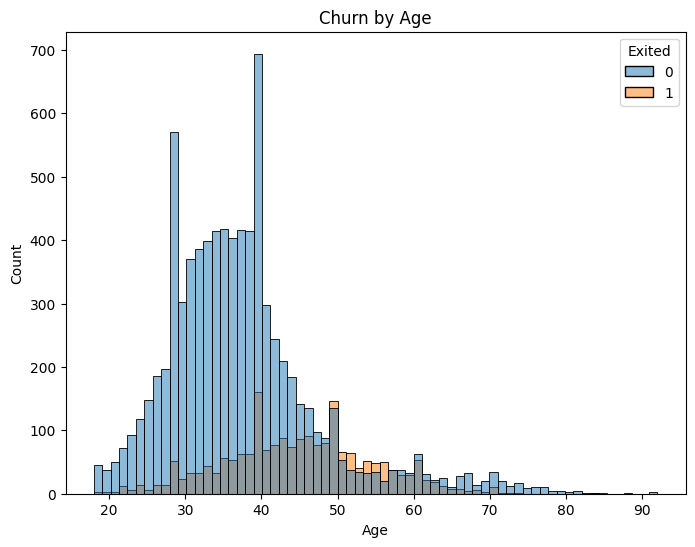

In [153]:
# churn by age
plt.figure(figsize=(8, 6))
sns.histplot(x='Age', hue='Exited', data=df)
plt.title('Churn by Age')
plt.show()

The highest churn rate is observed in the 50-60 age group,this implies that older customers are more likely to churn, while younger customers are more likely to stay with the bank.

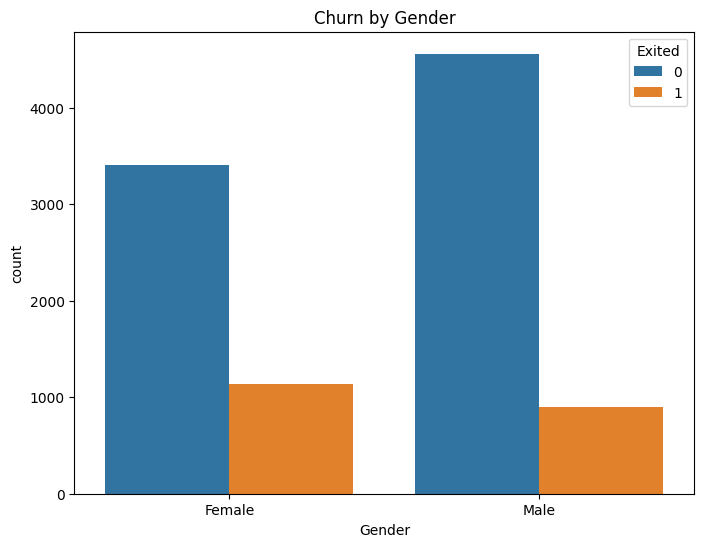

In [154]:
# churn by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Exited', data=df)
plt.title('Churn by Gender')
plt.show()


The churn rate is higher for female customers compared to male customers. This indicates that gender may play a role in customer churn.

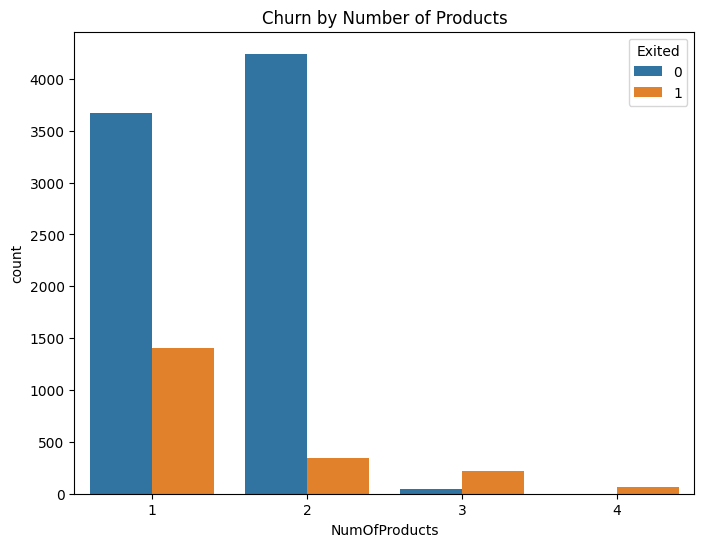

In [155]:
# churn by no.of products
plt.figure(figsize=(8, 6))
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
plt.title('Churn by Number of Products')
plt.show()

Customers with fewer products is more likely to churn, while those with more products have a lower churn rate.

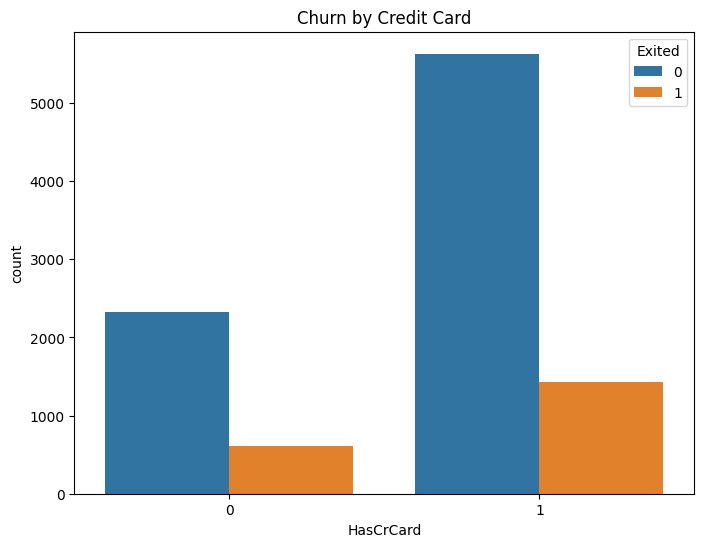

In [156]:
# churn by credit card
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.title('Churn by Credit Card')
plt.show()

The churn rate appears to be more for customers with credit card.

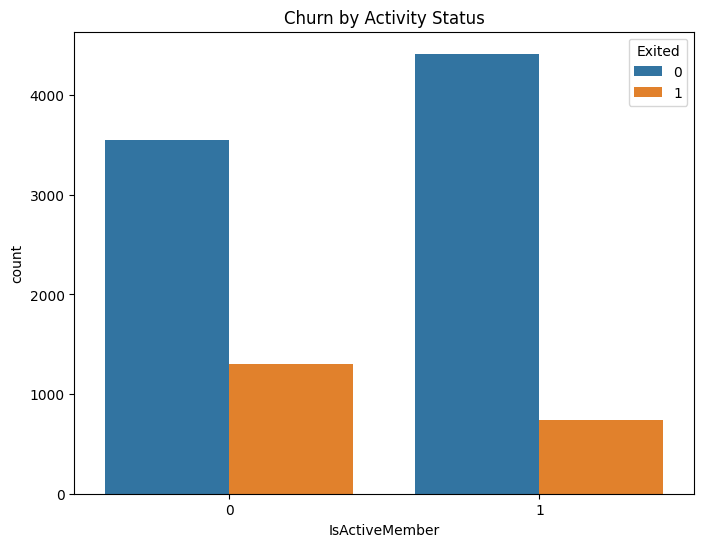

In [157]:
plt.figure(figsize=(8, 6))
sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.title('Churn by Activity Status')
plt.show()


Active members appear to have a lower churn rate compared to inactive members.

# Label Encoding

In [158]:
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [159]:
# checking datatypes after label encoding
df.dtypes

CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [160]:
# checking correlation
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


# Heatmap to show correlation

<Axes: >

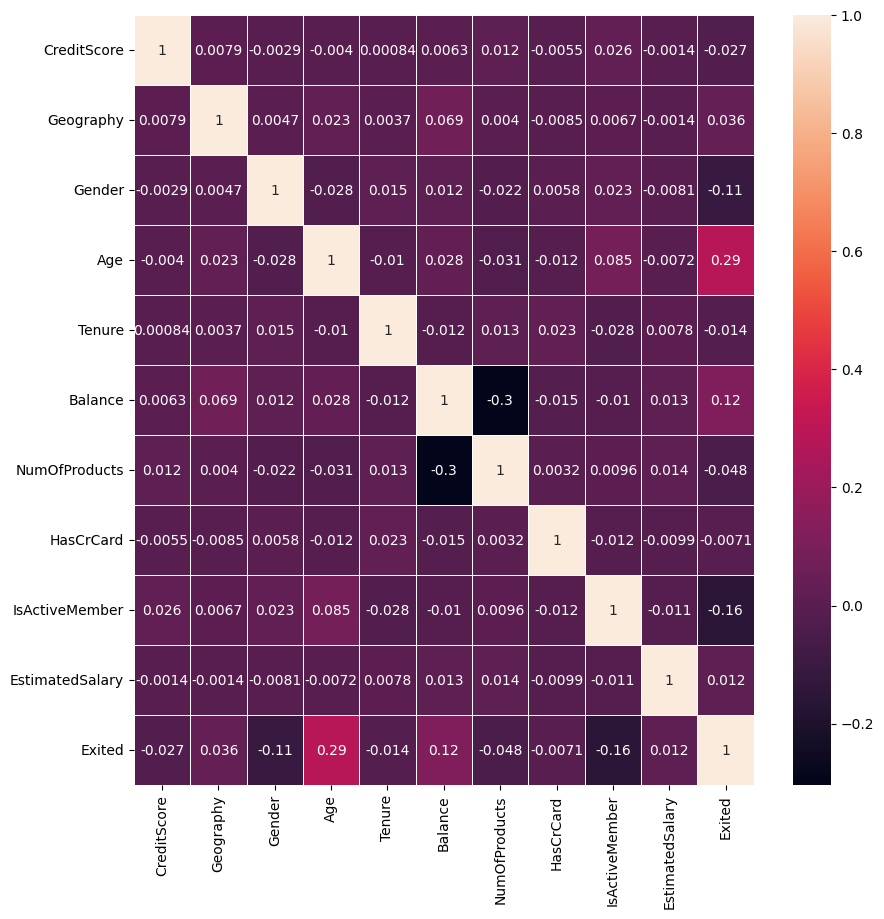

In [161]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,ax=ax)

# Splitting X and Y

In [162]:
X=df.iloc[:,:-1]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [163]:
y=df.iloc[:,-1]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Normalisation

In [164]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.538     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.718     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.21039009],
       [0.844     , 0.5       , 1.        , ..., 1.        , 0.        ,
        0.46442905],
       [0.884     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.19091423]])

# Splitting data to train data and test data

In [165]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=1)
X_train

array([[0.588     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.10479651],
       [0.262     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.12334158],
       [0.66      , 0.        , 0.        , ..., 1.        , 0.        ,
        0.40886535],
       ...,
       [0.644     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.46012449],
       [0.626     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50583491],
       [0.826     , 0.5       , 1.        , ..., 1.        , 0.        ,
        0.16727277]])

# **Model building**

K-Nearest Neighbours

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2373
           1       0.58      0.30      0.39       627

    accuracy                           0.81      3000
   macro avg       0.71      0.62      0.64      3000
weighted avg       0.78      0.81      0.78      3000



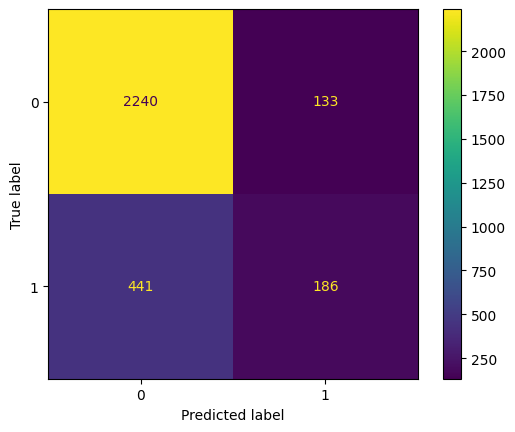

In [166]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Naive Bayes

              precision    recall  f1-score   support

           0       0.83      0.99      0.90      2373
           1       0.82      0.22      0.35       627

    accuracy                           0.83      3000
   macro avg       0.82      0.60      0.62      3000
weighted avg       0.83      0.83      0.78      3000



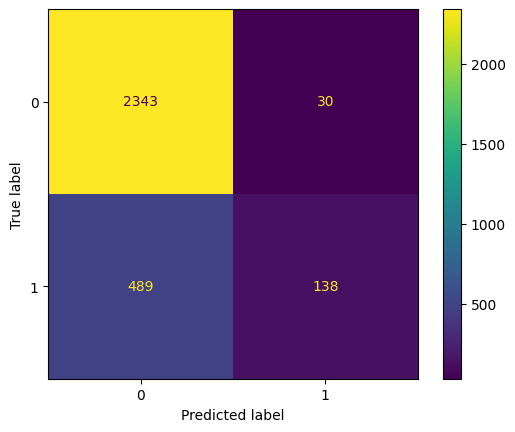

In [167]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred=nb.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


Support Vector Classifier

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2373
           1       0.85      0.31      0.45       627

    accuracy                           0.84      3000
   macro avg       0.85      0.65      0.68      3000
weighted avg       0.84      0.84      0.81      3000



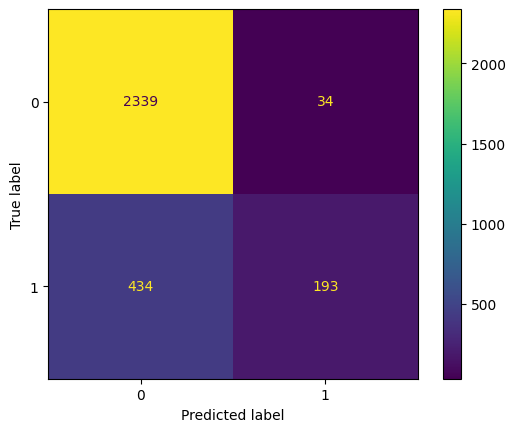

In [168]:
sv=SVC()
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))



Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2373
           1       0.51      0.52      0.52       627

    accuracy                           0.79      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.80      0.79      0.80      3000



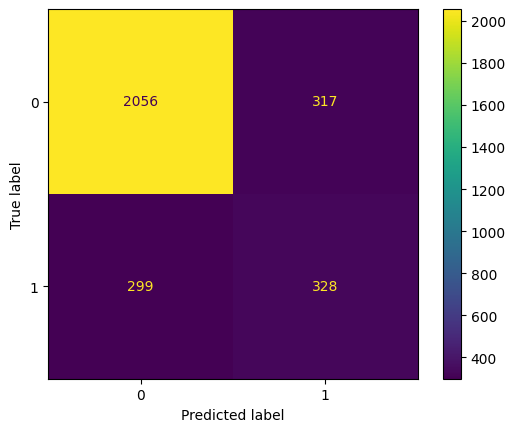

In [169]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


Random Forrest Classifier

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2373
           1       0.76      0.45      0.56       627

    accuracy                           0.86      3000
   macro avg       0.82      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000



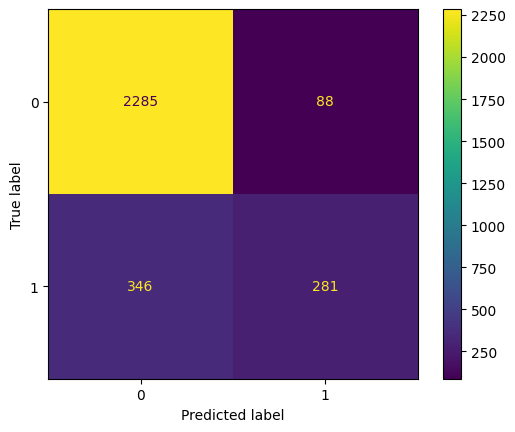

In [170]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


Adaboost Classifier

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2373
           1       0.75      0.48      0.58       627

    accuracy                           0.86      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



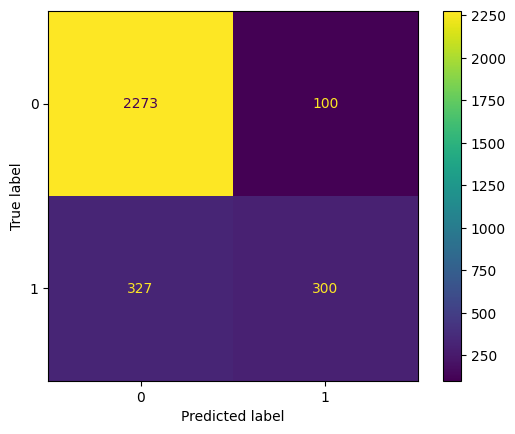

In [171]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred=ad.predict(X_test)
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


Accuracy comparison

In [172]:
df=pd.DataFrame({'Model':['KNN','NAIVE BAYES','SVC','DECISION TREE','RANDOM FORREST','ADABOOST'],'Accuracy':[0.81,0.83,0.84,0.79,0.86,0.86]})
df['Accuracy']=df['Accuracy']*100
df

,Model,Accuracy
0,KNN,81.0
1,NAIVE BAYES,83.0
2,SVC,84.0
3,DECISION TREE,79.0
4,RANDOM FORREST,86.0
5,ADABOOST,86.0


Random Forrest and Adaboost have high Accuracy scores

# **Plotting Accuracy of models**

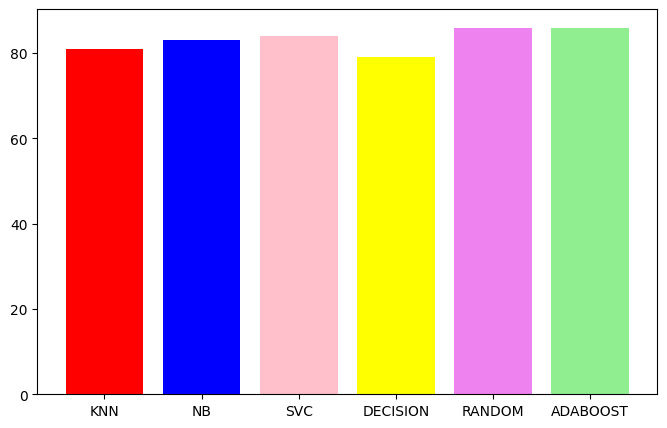

In [173]:
plt.figure(figsize=(8,5))
Models=['KNN','NB','SVC','DECISION','RANDOM','ADABOOST']
Accuracy=[81.0,83.0,84.0,79.0,86.0,86.0]
plt.bar(Models,Accuracy,color=['red','blue','pink','yellow','violet','lightgreen'])
plt.show()

# **Balancing the Dataset**

In [174]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Over sampling

In [175]:
oversample=SMOTE(random_state=1)
X_os,y_os=oversample.fit_resample(X,y)

Normalising and train test split

In [176]:
scaler=MinMaxScaler()
X_scaled_os=scaler.fit_transform(X_os)

In [177]:
X_train,X_test,y_train,y_test=train_test_split(X_os,y_os,test_size=0.3,random_state=1)

Model Building

In [178]:
knn1=KNeighborsClassifier()
nb1=GaussianNB()
svc1=SVC()
dt1=DecisionTreeClassifier()
rf1=RandomForestClassifier()
ad1=AdaBoostClassifier()
lst=[knn1,nb1,svc1,dt1,rf1,ad1]
for i in lst:
  print('**********',i,'*********')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))

********** KNeighborsClassifier() *********
              precision    recall  f1-score   support

           0       0.68      0.59      0.63      2322
           1       0.66      0.73      0.69      2456

    accuracy                           0.67      4778
   macro avg       0.67      0.66      0.66      4778
weighted avg       0.67      0.67      0.66      4778

********** GaussianNB() *********
              precision    recall  f1-score   support

           0       0.73      0.68      0.70      2322
           1       0.71      0.76      0.74      2456

    accuracy                           0.72      4778
   macro avg       0.72      0.72      0.72      4778
weighted avg       0.72      0.72      0.72      4778

********** SVC() *********
              precision    recall  f1-score   support

           0       0.58      0.38      0.46      2322
           1       0.56      0.74      0.64      2456

    accuracy                           0.57      4778
   macro avg       0.57

Accuracy comparison

In [179]:
df=pd.DataFrame({'Model':['KNN','NAIVE BAYES','SVC','DECISION TREE','RANDOM FORREST','ADABOOST'],'Accuracy':[0.67 ,0.72,0.57,0.79,0.86,0.82]})
df['Accuracy']=df['Accuracy']*100
df

,Model,Accuracy
0,KNN,67.0
1,NAIVE BAYES,72.0
2,SVC,57.0
3,DECISION TREE,79.0
4,RANDOM FORREST,86.0
5,ADABOOST,82.0


### Plotting Accuracy

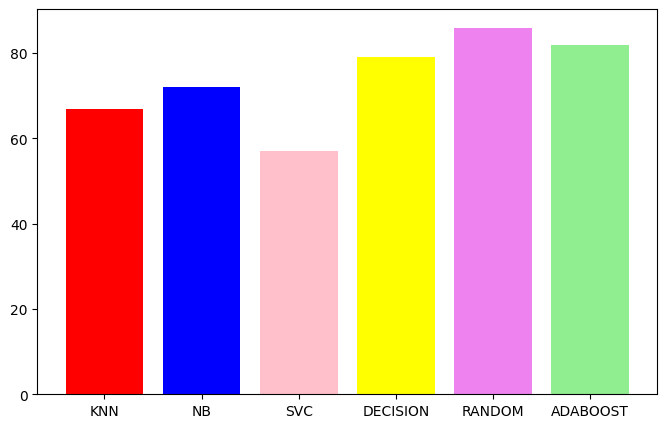

In [180]:
plt.figure(figsize=(8,5))
Models=['KNN','NB','SVC','DECISION','RANDOM','ADABOOST']
Accuracy=[67.0 ,72.0,57.0,79.0,86.0,82.0]
plt.bar(Models,Accuracy,color=['red','blue','pink','yellow','violet','lightgreen'])
plt.show()

### From the chart we can say that Accuracy of Random forrest classifier and Desicion tree classifier is same but others have decreased.

## Under sampling

In [181]:
undersample=RandomUnderSampler(random_state=1)
X_us,y_us=undersample.fit_resample(X,y)

Normalising and train test split

In [182]:
scaler=MinMaxScaler()
X_scaled_us=scaler.fit_transform(X_us)

In [183]:
X_train,X_test,y_train,y_test=train_test_split(X_us,y_us,test_size=0.3,random_state=1)

Model Building

In [184]:
knn2=KNeighborsClassifier()
nb2=GaussianNB()
svc2=SVC()
dt2=DecisionTreeClassifier()
rf2=RandomForestClassifier()
ad2=AdaBoostClassifier()
lst=[knn2,nb2,svc2,dt2,rf2,ad2]
for i in lst:
  print('**********',i,'*********')
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))

********** KNeighborsClassifier() *********
              precision    recall  f1-score   support

           0       0.54      0.53      0.53       622
           1       0.52      0.54      0.53       601

    accuracy                           0.53      1223
   macro avg       0.53      0.53      0.53      1223
weighted avg       0.53      0.53      0.53      1223

********** GaussianNB() *********
              precision    recall  f1-score   support

           0       0.70      0.73      0.72       622
           1       0.71      0.68      0.70       601

    accuracy                           0.71      1223
   macro avg       0.71      0.71      0.71      1223
weighted avg       0.71      0.71      0.71      1223

********** SVC() *********
              precision    recall  f1-score   support

           0       0.62      0.41      0.50       622
           1       0.55      0.74      0.63       601

    accuracy                           0.57      1223
   macro avg       0.58

Accuracy Comparison

In [185]:
df=pd.DataFrame({'Model':['KNN','NAIVE BAYES','SVC','DECISION TREE','RANDOM FORREST','ADABOOST'],'Accuracy':[0.53 ,0.71,0.57,0.66,0.77,0.77]})
df['Accuracy']=df['Accuracy']*100
df

,Model,Accuracy
0,KNN,53.0
1,NAIVE BAYES,71.0
2,SVC,57.0
3,DECISION TREE,66.0
4,RANDOM FORREST,77.0
5,ADABOOST,77.0


### Plotting Accuracy

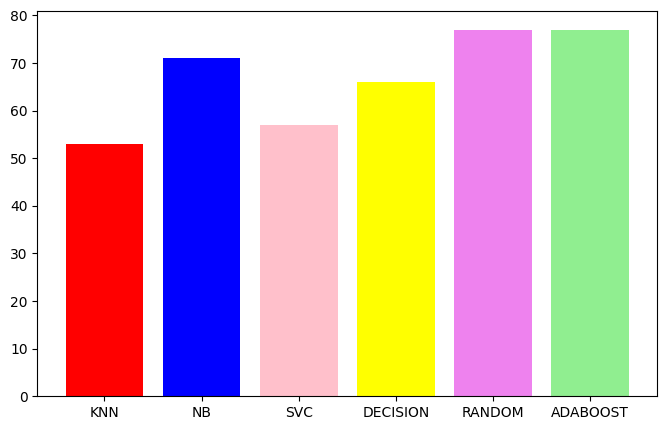

In [186]:
plt.figure(figsize=(8,5))
Models=['KNN','NB','SVC','DECISION','RANDOM','ADABOOST']
Accuracy=[53.0 ,71.0,57.0,66.0,77.0,77.0]
plt.bar(Models,Accuracy,color=['red','blue','pink','yellow','violet','lightgreen'])
plt.show()

### From the chart we can say that Accuracy of every model have decreased

**Accuracy Comparison**

In [187]:
df=pd.DataFrame({'Model':['KNN','NAIVE BAYES','SVC','DECISION TREE','RANDOM FORREST','ADABOOST'],'Accuracy':[81.0,83.0,84.0,79.0,86.0,86.0],'Over sampling':[67.0 ,72.0,57.0,79.0,86.0,82.0],'Under sampling':[53.0 ,71.0,57.0,66.0,77.0,77.0]})
df

,Model,Accuracy,Over sampling,Under sampling
0,KNN,81.0,67.0,53.0
1,NAIVE BAYES,83.0,72.0,71.0
2,SVC,84.0,57.0,57.0
3,DECISION TREE,79.0,79.0,66.0
4,RANDOM FORREST,86.0,86.0,77.0
5,ADABOOST,86.0,82.0,77.0


# **Observations -** By comparing the performance measures of different algorithms the most accurate model is using Random Forrest Classifier and Adaboost Classifier.

### Predicting new values

In [188]:
y_new=rf.predict(scaler.transform([[850,2,0,43,2,125510.82,1,1,1,79084.10]]))
if y_new==0:
  print('Continues to be a customer')
else:
  print('Left the bank')


Continues to be a customer
